In [1]:
import astropy
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt

In [2]:
hdul = fits.open(r"C:\Users\amber\OneDrive\Desktop\SSI\Selected_stars_final.fits")
hdul.info()

Filename: C:\Users\amber\OneDrive\Desktop\SSI\Selected_stars_final.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       7   (20, 2, 4000)   float64   


In [3]:
hdu = hdul[0]
data = hdu.data
data

array([[[1.02733700e+06, 6.96227980e+00, 7.42099991e+01, ...,
         2.88849996e+01, 0.00000000e+00, 7.40675000e+01],
        [0.00000000e+00, 3.09767991e-01, 0.00000000e+00, ...,
         3.29800018e-01, 0.00000000e+00, 2.00000000e-03]],

       [[1.16144700e+06, 4.16810989e+00, 3.63199997e+01, ...,
         5.85422713e+01, 0.00000000e+00, 3.64126000e+01],
        [0.00000000e+00, 8.03358018e-01, 0.00000000e+00, ...,
         4.85437113e-01, 0.00000000e+00, 3.80000000e-03]],

       [[1.16345300e+06, 4.44000006e+00, 4.03300018e+01, ...,
         2.53728516e+01, 0.00000000e+00, 4.03300000e+01],
        [0.00000000e+00, 3.15701991e-01, 0.00000000e+00, ...,
         2.22888550e-01, 0.00000000e+00, 3.70000000e-03]],

       ...,

       [[1.27846830e+07, 3.74499989e+00, 2.87199993e+01, ...,
         1.05284650e+01, 0.00000000e+00, 2.92100000e+01],
        [0.00000000e+00, 1.44336998e+00, 0.00000000e+00, ...,
         9.80607243e-02, 0.00000000e+00, 9.80000000e-03]],

       [[1.27849480

In [5]:
data_USE = np.transpose(data)
Teff = np.array(data_USE[4,1,:])
nu_max = np.array(data_USE[2,0,:])

In [6]:
Teff

array([4673., 4784., 5026., ..., 4991., 4889., 4644.])

In [7]:
nu_max

array([74.20999908, 36.31999969, 40.33000183, ..., 28.71999931,
       34.08000183, 50.59999847])

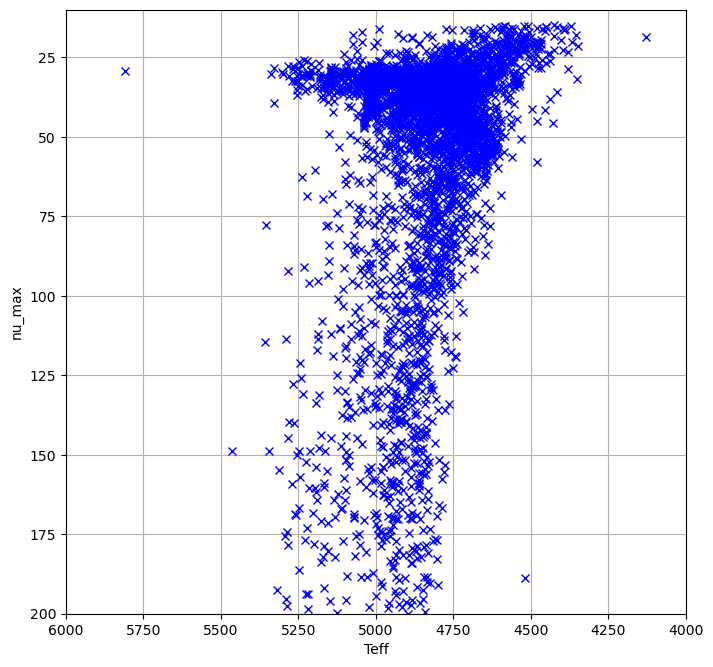

In [8]:
from matplotlib.pyplot import figure
figure(figsize=(8,8), dpi=100)
plt.grid()
plt.plot(Teff, nu_max, 'bx')
plt.xlim(6000, 4000)
plt.ylim(200, 10)
plt.xlabel('Teff')
plt.ylabel('nu_max')
plt.show()

In [12]:
hdul = fits.open(r"C:\Users\amber\OneDrive\Desktop\SSI\APOKASC_cat_v6.5.4.fits")
hdul.info()

Filename: C:\Users\amber\OneDrive\Desktop\SSI\APOKASC_cat_v6.5.4.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       4   ()      
  1  Joined        1 BinTableHDU   1129   23363R x 430C   [20A, K, 20A, 20A, D, D, D, D, E, E, E, E, E, E, E, E, E, E, 23A, D, D, D, D, D, D, D, D, D, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, 5A, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, I, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E,

In [13]:
#prihdr = hdul[0].header #accesses primary header
hdu = hdul[1]
hdu.header #should show all column headers

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                 2272 / length of dimension 1                          
NAXIS2  =                23363 / length of dimension 2                          
PCOUNT  =                    0 / number of group parameters                     
GCOUNT  =                    1 / number of groups                               
TFIELDS =                  430 / number of table fields                         
TTYPE1  = 'KEPLER_ID'                                                           
TFORM1  = '20A     '                                                            
TTYPE2  = 'KEPLER_INT'                                                          
TFORM2  = 'K       '                                                            
TNULL2  =               9999

In [14]:
TeffSun = 5774
gSun = 27395.9
numaxSun = 3090
gStar = ((Teff**0.5)*(nu_max)*(gSun))/((TeffSun**0.5)*(numaxSun))

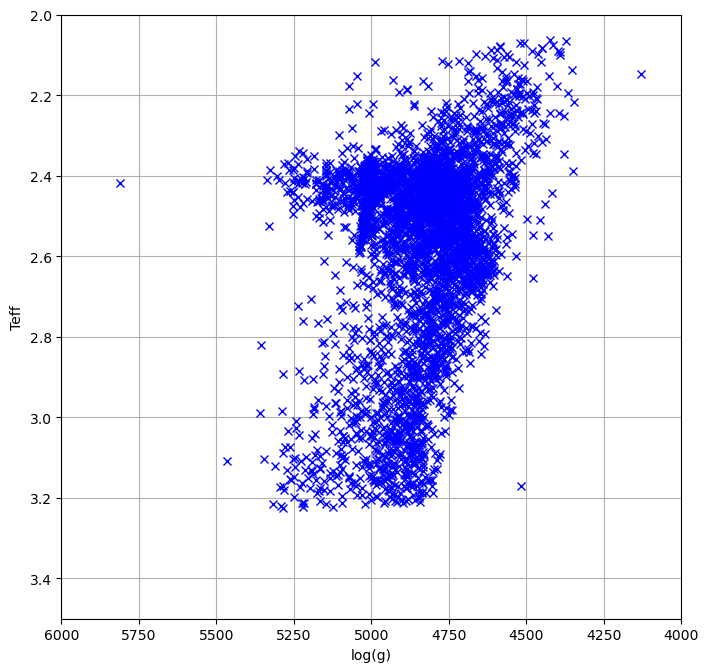

In [15]:
from matplotlib.pyplot import figure
figure(figsize=(8,8), dpi=100)
plt.grid()
x = np.log10(gStar)
plt.plot(Teff, x, 'bx')
plt.xlim(6000, 4000)
plt.ylim(3.5, 2)
plt.xlabel('log(g)')
plt.ylabel('Teff')
plt.show()

In [16]:
Logg_A = hdu.data['LOGG_COR']
Logg_err = hdu.data['LOGG_COR_ERR']
Teff_A = hdu.data['TEFF_COR']
Teff_err = hdu.data['TEFF_COR_ERR']
FeH_A = hdu.data['FE_H_ADOP_COR']
FeH_err = hdu.data['FE_H_ADOP_COR_ERR']
FeH_FIT = hdu.data['FE_H_ADOP_FIT']
Teff_FIT = hdu.data['TEFF_FIT']

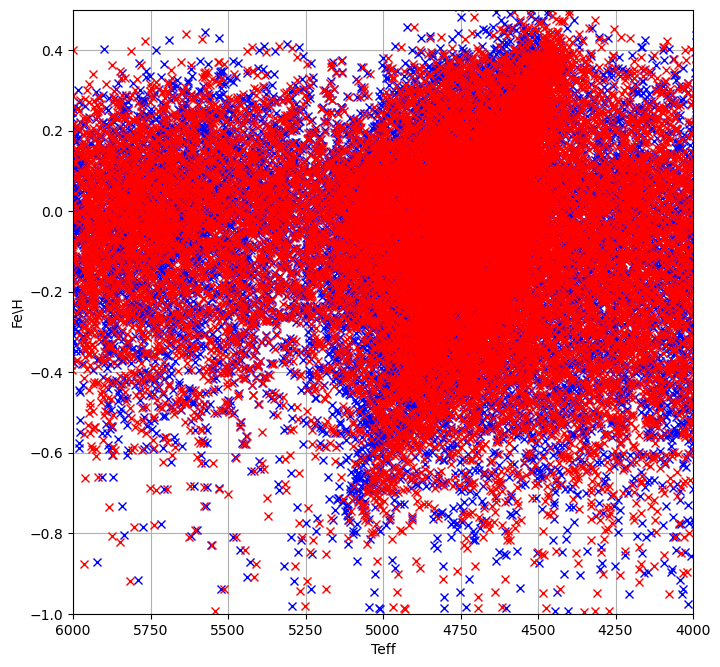

In [17]:
from matplotlib.pyplot import figure
figure(figsize=(8,8), dpi=100)
plt.grid()
x1 = Teff_A
x2 = Teff_FIT
y1 = FeH_A
y2 = FeH_FIT
plt.xlim(6000, 4000)
plt.ylim(-1.0, 0.5)
plt.xlabel('Teff')
plt.ylabel('Fe\H')
plt.plot(x1, y1, 'bx') #this is not right. Other order shows weird vertical lines. It's encountering errors when trying to use log scale.
#how to scale? Also how to input error params and exclude the 9 targets?
plt.plot(x2, y2, 'rx')
plt.show()

In [18]:
import pandas as pd
with fits.open(r"C:\Users\amber\OneDrive\Desktop\SSI\APOKASC_cat_v6.5.4.fits") as data:
    df = pd.DataFrame(data[0].data) #do same thing with APOGEE file? How to check matches for kic nums? I think you
    #use 'KEPLER_INT'
#compare background params of APOGEE to metallicity params of APOKASC -- graphs

In [44]:
KIC_num = hdu.data['KEPLER_INT']
hdul_back = fits.open(r"C:\Users\amber\OneDrive\Desktop\SSI\Selected_stars_final.fits")
hdu_back = hdul_back[0]
data_back = hdu_back.data
data_USE_back = np.transpose(data_back)
KIC_back = np.array(data_USE[0,0,:])
Teff_A = hdu.data['TEFF_COR']
Amp_HV1 = np.array(data_USE[6,0,:])
Evol_stage = np.array(data_USE[3, 0, :])
Evol_stage
#Evol_stage = 1 - red giant, #2- red clump
#make color coded plot (or seperate ones for red giant branch and red clump) after other backg. plots

array([1., 2., 2., ..., 2., 2., 1.])

In [34]:
import numpy as np
common_KIC, Teff_indexes, Amp_indexes = np.intersect1d(KIC_num, KIC_back, return_indices=True)
Teff_final = Teff_A[Teff_indexes]
Amp_HV1_final = Amp_HV1[Amp_indexes]

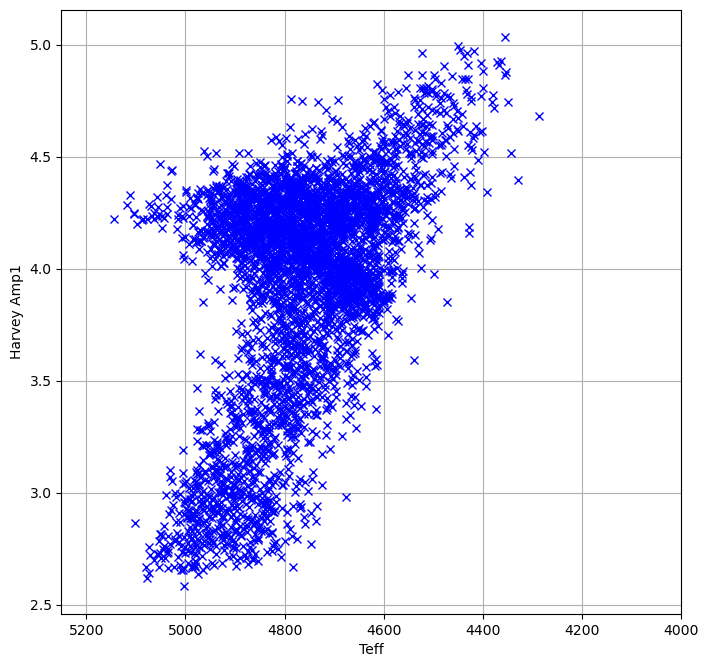

In [45]:
from matplotlib.pyplot import figure
figure(figsize=(8,8), dpi=100)
plt.grid()
y = np.log10(Amp_HV1_final)
plt.xlim(5250, 4000)
plt.xlabel('Teff')
plt.ylabel('Harvey Amp1')
plt.plot(Teff_final, y, 'bx')
plt.show()
#try log10 scaling, which one works better for other graphs (normally for harv freq)